In [1]:
import os
import sys
import time
import h5py
import numpy as np

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## The negative APCP issue

* very rare cases for a single value to appear: -0.0625 [mm/3hr]
* Can ignore and convert to 0

In [7]:
name_gfs = '/glade/campaign/cisl/aiml/ksha/GFS/GFS_{}_ini{:02d}_f{:02d}.hdf'

In [33]:
year = 2021
ini = 0 #18
lead = 30 #21

with h5py.File(name_gfs.format(year, ini, lead), 'r') as h5io:
    APCP1 = h5io['APCP'][...]
            
with h5py.File(name_gfs.format(year, ini, lead-3), 'r') as h5io:
    APCP0 = h5io['APCP'][...]

In [34]:
APCP_3h = APCP1 - APCP0
min_apcp = np.min(APCP_3h, axis=(1, 2))

In [42]:
# min_apcp[85]
min_apcp[169]

-0.0625

In [43]:
APCP1[169, APCP_3h[169, ...]<0]
APCP0[169, APCP_3h[169, ...]<0]

array([10.1875])

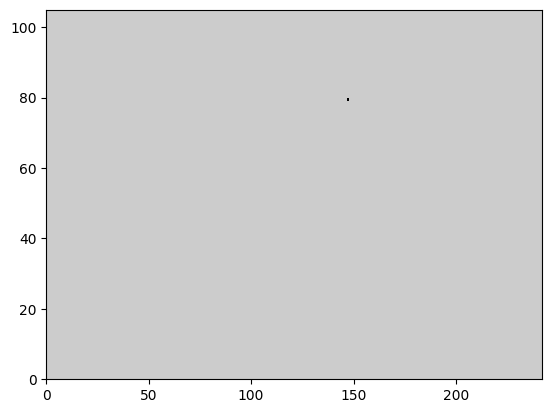

In [46]:
plt.pcolormesh(APCP_3h[169, ...]<0, cmap=plt.cm.nipy_spectral_r)

## Value range checks

* All look normal
* for predictor normalization:

```python
def norm_rh(x):
    return (x-50)/28/2

def norm_t(x):
    return (x-281)/10/2

def norm_u(x):
    return (x-3.5)/6.5/2

def norm_v(x):
    return (x)/6.5/2

def norm_pwat(x):
    return (x-20.5)/15/2

def norm_cape(x):
    return (x-200)/450/2
```

In [58]:
year = 2021
LEADs = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36] # forecast lead time [hr]
INIs = [0, 6, 12, 18] # initialization times [UTC hrs]

for lead in LEADs:
    for ini in INIs:

        with h5py.File(name_gfs.format(year, ini, lead), 'r') as h5io:
            CAPE = h5io['CAPE'][...]
            PWAT = h5io['PWAT'][...]
            T800 = h5io['T800'][...]
            U800 = h5io['U800'][...]
            V800 = h5io['V800'][...]
            RH800 = h5io['RH800'][...]
            
        print('-------------- ini {} lead {} --------------'.format(ini, lead))
        print('CAPE min = {}; max = {}; mean = {}; std = {}'.format(np.min(CAPE), np.max(CAPE), np.mean(CAPE), np.std(CAPE)))
        print('PWAT min = {}; max = {}; mean = {}; std = {}'.format(np.min(PWAT), np.max(PWAT), np.mean(PWAT), np.std(PWAT)))
        print('T800 min = {}; max = {}; mean = {}; std = {}'.format(np.min(T800), np.max(T800), np.mean(T800), np.std(T800)))
        print('U800 min = {}; max = {}; mean = {}; std = {}'.format(np.min(U800), np.max(U800), np.mean(U800), np.std(U800)))
        print('V800 min = {}; max = {}; mean = {}; std = {}'.format(np.min(V800), np.max(V800), np.mean(V800), np.std(V800)))
        print('RH800 min = {}; max = {}; mean = {}; std = {}'.format(np.min(RH800), np.max(RH800), np.mean(RH800), np.std(RH800)))

-------------- ini 0 lead 3 --------------
CAPE min = 0.0; max = 4780.0; mean = 177.26523286593024; std = 466.66419711039964
PWAT min = 0.39999998807907106; max = 76.15510501708985; mean = 19.500414565942876; std = 13.219182366001142
T800 min = 234.6397705078125; max = 306.9170703125; mean = 281.2171866370405; std = 9.453425378461269
U800 min = -53.545788574218754; max = 47.63158447265625; mean = 3.695200551812728; std = 6.509721538676695
V800 min = -39.984902954101564; max = 54.91509704589844; mean = 0.12277813310248435; std = 6.374955846507335
RH800 min = 0.0; max = 100.0; mean = 50.585721067641416; std = 28.585074359776073
-------------- ini 6 lead 3 --------------
CAPE min = 0.0; max = 5026.0; mean = 150.6961335468185; std = 425.3962266138168
PWAT min = 0.2999999880790711; max = 74.55951163330079; mean = 19.299294552363378; std = 13.164745802405372
T800 min = 236.17226562500002; max = 304.45216796875; mean = 280.6931481972367; std = 9.267330850871629
U800 min = -56.272253417968756;